In [ ]:
#import tools required, copied over from exercise_script.py

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches


# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles


plt.ion()

In [ ]:
#import practical 3b files, counties and wards

In [6]:
counties = gpd.read_file('data_files/counties.shp')
wards = gpd.read_file('data_files/NI_wards.shp')
print(counties.head())
print(wards.head())

   COUNTY_ID   CountyName    Area_SqKM  OBJECTID  \
0          6       TYRONE  3265.796622         1   
1          1       ANTRIM  3097.847750         2   
2          2       ARMAGH  1327.228438         3   
3          4    FERMANAGH  1850.832538         4   
4          5  LONDONDERRY  2118.316853         5   

                                            geometry  
0  POLYGON ((-7.38177 54.94208, -7.38170 54.94201...  
1  MULTIPOLYGON (((-5.95296 54.55222, -5.95298 54...  
2  POLYGON ((-6.35398 54.50927, -6.35191 54.50891...  
3  POLYGON ((-7.69417 54.60511, -7.69390 54.60498...  
4  POLYGON ((-6.66919 55.19899, -6.66918 55.19893...  
  Ward Code          Ward  Population  \
0    95DD05     Ballykeel        1739   
1    95DD06  Ballyloughan        2588   
2    95DD03      Ardeevin        3503   
3    95DD04        Ballee        1926   
4    95DD09  Craigywarren        2590   

                                            geometry  
0  POLYGON ((-6.25014 54.85879, -6.25015 54.85875...  


In [ ]:
# in this section, write the script to load the counties and ward data 
# and transform to a UTM projection
# check crs

In [10]:
counties=counties.to_crs(epsg=2157)
wards=wards.to_crs(epsg=2157)

In [11]:
counties.crs
wards.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
#complete a spatial join of wards and counties
#now the population column is in both wards AND join files 


In [12]:
join =gpd.sjoin(wards, counties, how='inner', lsuffix='left', rsuffix='right')
join

,Ward Code,Ward,Population,geometry,index_right,COUNTY_ID,CountyName,Area_SqKM,OBJECTID
0,95DD05,Ballykeel,1739,"POLYGON ((712347.338 902620.535, 712347.182 90...",1,1,ANTRIM,3097.847750,2
1,95DD06,Ballyloughan,2588,"POLYGON ((709815.265 903745.712, 709813.140 90...",1,1,ANTRIM,3097.847750,2
2,95DD03,Ardeevin,3503,"POLYGON ((709480.605 901295.398, 709480.917 90...",1,1,ANTRIM,3097.847750,2
3,95DD04,Ballee,1926,"POLYGON ((711695.814 901099.897, 711690.440 90...",1,1,ANTRIM,3097.847750,2
4,95DD09,Craigywarren,2590,"POLYGON ((712375.667 906822.910, 712367.762 90...",1,1,ANTRIM,3097.847750,2
...,...,...,...,...,...,...,...,...,...
484,95YY21,Trillick,2440,"POLYGON ((634061.581 852434.297, 634048.365 85...",3,4,FERMANAGH,1850.832538,4
541,95OO09,Clogher,2252,"POLYGON ((654957.567 853280.941, 654958.645 85...",3,4,FERMANAGH,1850.832538,4
560,95OO16,Fivemiletown,2114,"POLYGON ((650596.739 849979.113, 650594.630 84...",3,4,FERMANAGH,1850.832538,4
567,95YY06,Dromore,2394,"POLYGON ((636353.128 863144.039, 636354.128 86...",3,4,FERMANAGH,1850.832538,4


In [29]:
join['Population'].sum()


2213977

In [32]:
join.groupby(['CountyName'])['Population'].sum() 

CountyName
ANTRIM         718369
ARMAGH         232505
DOWN           639915
FERMANAGH       75906
LONDONDERRY    293296
TYRONE         253986
Name: Population, dtype: int64

In [36]:
join.groupby(['CountyName', 'Ward'])['Population'].sum()

CountyName  Ward           
ANTRIM      Abbey              2814
            Academy            2099
            Aghagallon         4931
            Agivey             2499
            Ahoghill           3888
                               ... 
TYRONE      Trillick           2440
            Tullagh            2216
            Victoria Bridge    2288
            Washing Bay        3106
            West               3262
Name: Population, Length: 702, dtype: int64

In [38]:
myCRS = ccrs.UTM(29)


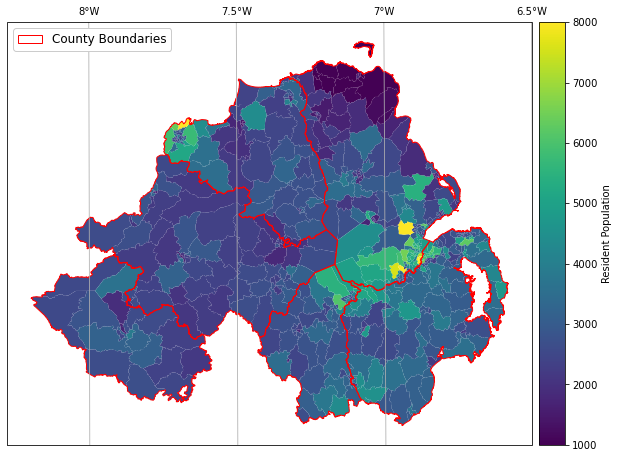

In [41]:
# create a figure of size 10x10 (representing the page size in inches
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection=myCRS))

# add gridlines below
gridlines = ax.gridlines(draw_labels=True,
                         xlocs=[-8, -7.5, -7, -6.5, -6, -5.5],
                         ylocs=[54, 54.5, 55, 55.5])
gridlines.right_labels = False
gridlines.bottom_labels = False

# to make a nice colorbar that stays in line with our map, use these lines:
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)

# plot the ward data into our axis, using
ward_plot = wards.plot(column='Population', ax=ax, vmin=1000, vmax=8000, cmap='viridis',
                       legend=True, cax=cax, legend_kwds={'label': 'Resident Population'})

county_outlines = ShapelyFeature(counties['geometry'], myCRS, edgecolor='r', facecolor='none')

ax.add_feature(county_outlines)
county_handles = generate_handles([''], ['none'], edge='r')

ax.legend(county_handles, ['County Boundaries'], fontsize=12, loc='upper left', framealpha=1)

# save the figure
fig.savefig('sample_map.png', dpi=300, bbox_inches='tight')


In [65]:
join.groupby(['CountyName','Ward'])['Population'].sum()

CountyName  Ward           
ANTRIM      Abbey              2814
            Academy            2099
            Aghagallon         4931
            Agivey             2499
            Ahoghill           3888
                               ... 
TYRONE      Trillick           2440
            Tullagh            2216
            Victoria Bridge    2288
            Washing Bay        3106
            West               3262
Name: Population, Length: 702, dtype: int64

In [62]:
join.sort_values(by=['Population', 'Ward','CountyName'], inplace=True, ascending=False)
print(join[['CountyName', 'Ward', 'Population']])

      CountyName                    Ward  Population
424       ANTRIM               Derryaghy        9464
189         DOWN                 Botanic        8945
189       ANTRIM                 Botanic        8945
167  LONDONDERRY                 Culmore        8872
353       ANTRIM                 Mallusk        8338
..           ...                     ...         ...
525       ANTRIM  Moss-Side and Moyarget         948
534       ANTRIM                 Kinbane         897
45        ANTRIM   Bonamargy and Rathlin         879
48        ANTRIM             Dunseverick         813
46        ANTRIM               Bushmills         738

[702 rows x 3 columns]
